<a href="https://colab.research.google.com/github/nadakhelif/CNN_tp_deep_learning/blob/main/tp2_FCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LE TRINOME :
### Nada Khelif -  Chaima bouhlel  - Ahmed Frikha

# 1 Classification binaire avec des reseaux de neurones entierement connectes

## 1.1 Dataset

### 1. Creer des donnees avec make circles()

In [ ]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
X, y =datasets.make_circles(n_samples=1000,random_state=41,noise=0.03)
display(X[:5])
display(y[:5])

array([[-0.9187073 ,  0.36570492],
       [ 0.79446081,  0.18421773],
       [-0.3596275 , -0.69222213],
       [ 0.98231765, -0.19947534],
       [-0.46158817,  0.70624664]])

array([0, 1, 1, 0, 1], dtype=int64)

### 2.Afficher les dimensions du dataset

In [ ]:
X.shape

(1000, 2)

=>les dimensions de l’entree du classifieur : (1000,2) 1000 elements chacun avec 2 features

=>les dimensions de la sortie du classifieur :(1000,) tableau unidimensionnel de 1000 elements(y)
    

### 3. Visualiser les donnees

Text(0.5, 1.0, 'Random classification Data with 2 classes')

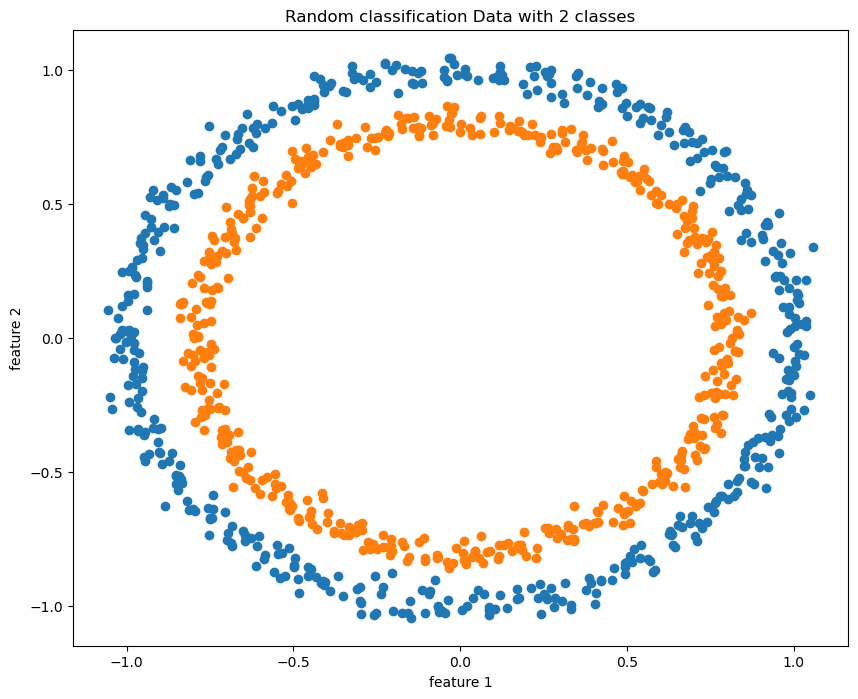

In [ ]:
fig = plt.figure(figsize=(10,8))
plt.scatter(x=X[:,0][y==0],y=X[:,1][y==0])
plt.scatter(x=X[:,0][y==1],y=X[:,1][y==1])
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.title("Random classification Data with 2 classes")

### 4. Cet dataset necessite une fonction lineaire ou non lineaire pour separer ses classes ? Justifier

NON LINEAIRE  => L'ensemble de données généré par datasets.make_circles ne peut pas être séparé par une fonction linéaire. Les points de données sont disposés en deux cercles, ce qui signifie qu'il n'y a pas de ligne droite qui puisse parfaitement séparer les deux classes.

### 5. Sous pytorch, on doit travailler avec des tenseurs PyTorch. Transformer vos tableaux NumPy en des tenseurs PyTorch a l’aide de ces lignes du code.

In [ ]:
import torch
X = torch . from_numpy (X) . type ( torch . float )
y = torch . from_numpy (y) . type ( torch . float )

### 6.Diviser les donnees en ensembles d’apprentissage et de test a l’aide de ` train test split().

In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## 1.2 Definition du modele

In [ ]:
from torch import nn
device = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
class ModelV0 ( nn . Module ):
     def __init__ ( self ) :
         super () . __init__ ()
         # Constructeur pour definir l’ architecture du modele
         self . layer_1 = nn . Linear ( in_features =2 , out_features = 5)
         self . layer_2 = nn . Linear ( in_features =5, out_features = 1)

     # Propagation des donnees dans le modele
     def forward ( self , x):
        return self . layer_2 ( self . layer_1 (x ))

In [ ]:
 model_0 = ModelV0().to( device )


#### (d) Ecrire la ligne du code qui permet d’afficher les couches du modele

In [ ]:
print(model_0.layer_1)
print(model_0.layer_2)

Linear(in_features=2, out_features=5, bias=True)
Linear(in_features=5, out_features=1, bias=True)


### 2. Comment choisir les dimensions de l’entr´ee et de la sortie du FCNN.


Dans ce cas, la dimension en entrée serait 2, car il existe deux features en entrée x1 et x2.
La dimension de sortie serait 1, puisque nous effectuons une tâche de classification binaire .

### 3. La couche 1 prend 2 features en entree et produit 5 features en sortie. C’est ce qu’on appelle avoir unites cachees (neurones). Cette couche transforme les donnees d’entree de 2 features en 5 features.Pourquoi faire ceci

En augmentant le nombre de neurones dans une couche cachée, on permet au modèle d'apprendre des représentations plus complexes capturer des caractéristiques plus riches puisque il peut être difficile pour un modèle avec une seule couche de neurones de bien les représenter.

Dans le cas présent, en transformant les données d'entrée de 2 features en 5 features, on permet à la couche suivante (qui a un seul neurone) de mieux séparer les deux classes de données circulaires.

### 4. Comment choisir la valeur de l’hyperparametre nombre de neurones par couche cachee.


Le choix du nombre de neurones par couche cachée dépend de la complexité du problème et de la quantité de données d'entrée.

En général, on commence avec un petit nombre de neurones et d'augmenter progressivement la complexité du modèle mais tout en prennaant en compte le risque de surajustement (overfitting) lorsque le nombre de neurones ou de couches cachées est tres grand .

### 5. Pourquoi la couche 2 a 5 features d’entr´ee ?


La couche 2 a 5 features d'entrée parce qu'elle est connectée à la couche 1 qui a 5 neurones de sortie

### 6. Definir la fonction de perte (entropie croisee binaire) et l’optimiseur (SGD - Stochastic Gradient Descent avec un learning rate de 0.1) du FCNN

In [ ]:
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD( params = model_0.parameters() , lr =0.1)


### 7. PyTorch a deux implementations de l’entropie croisee binaire. Expliquer la difference entre ces deux methodes torch.nn.BCELoss() et torch.nn.BCEWithLogitsLoss().

La différence entre ces deux méthodes réside dans le fait que BCEWithLogitsLoss combine la fonction sigmoïde et l'entropie croisée binaire en un seul calcul, tandis que BCELoss ne contient que la fonction d'entropie croisée binaire.

=> BCEWithLogitsLoss est généralement plus stable et plus rapide que BCELoss

## 1.3 Entraınement du modele

### (b) Ecrire la fonction qui permet de calculer l’exactitude de classification

In [ ]:
def accuracy_fn(y_true, y_pred):
    # Calculer le nombre de prédictions correctes
    correct_predictions = (y_pred == y_true).sum().float()
    # Calculer l'exactitude
    accuracy = correct_predictions / len(y_true)
    return accuracy

### (c) Afficher la progression du modele toutes les 10 ´epoques (Loss, Accuracy, Test loss et Test Accuracy).

In [ ]:
torch.manual_seed (42)

epochs = 100
print_every = 10
# Envoyer le dataset a l appareil d execution
X_train , y_train = X_train.to(device) , y_train.to(device)
X_test , y_test = X_test.to(device) , y_test.to(device)


for epoch in range (epochs):
    model_0.train()

    y_logits = model_0( X_train ).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))

    loss = loss_fn(y_logits , y_train )
    acc = accuracy_fn( y_true = y_train , y_pred = y_pred )

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()
    if (epoch+1) % print_every == 0:
        model_0.eval()
        with torch.inference_mode() :

            test_logits = model_0( X_test ).squeeze()
            test_pred = torch.round( torch.sigmoid( test_logits ))

            test_loss = loss_fn( test_logits , y_test )
            test_acc = accuracy_fn( y_true = y_test , y_pred = test_pred )
        print(f"Epoch {epoch+1}/{epochs}:")
        print(f"Train loss: {loss:.4f}, Train accuracy: {acc:.4f}")
        print(f"Test loss: {test_loss:.4f}, Test accuracy: {test_acc:.4f}")

Epoch 10/100:
Train loss: 0.6986, Train accuracy: 0.4625
Test loss: 0.6947, Test accuracy: 0.4800
Epoch 20/100:
Train loss: 0.6962, Train accuracy: 0.4762
Test loss: 0.6933, Test accuracy: 0.5000
Epoch 30/100:
Train loss: 0.6950, Train accuracy: 0.4800
Test loss: 0.6928, Test accuracy: 0.5150
Epoch 40/100:
Train loss: 0.6943, Train accuracy: 0.4900
Test loss: 0.6928, Test accuracy: 0.5000
Epoch 50/100:
Train loss: 0.6939, Train accuracy: 0.4900
Test loss: 0.6929, Test accuracy: 0.5050
Epoch 60/100:
Train loss: 0.6936, Train accuracy: 0.4875
Test loss: 0.6931, Test accuracy: 0.5000
Epoch 70/100:
Train loss: 0.6934, Train accuracy: 0.4875
Test loss: 0.6933, Test accuracy: 0.5150
Epoch 80/100:
Train loss: 0.6932, Train accuracy: 0.4888
Test loss: 0.6935, Test accuracy: 0.5050
Epoch 90/100:
Train loss: 0.6931, Train accuracy: 0.4888
Test loss: 0.6936, Test accuracy: 0.5050
Epoch 100/100:
Train loss: 0.6931, Train accuracy: 0.5000
Test loss: 0.6938, Test accuracy: 0.4850


### 2. Que remarquez-vous sur les performances du modele ?

On remarque que les performances du modèle ne sont pas bonnes, avec une accuracy de test qui ne dépasse pas les 51%

## 1.4 Evaluation du modele

### 1. Tracer la (les) frontiere(s) de decision pour les ensembles d’entraınement et de test.

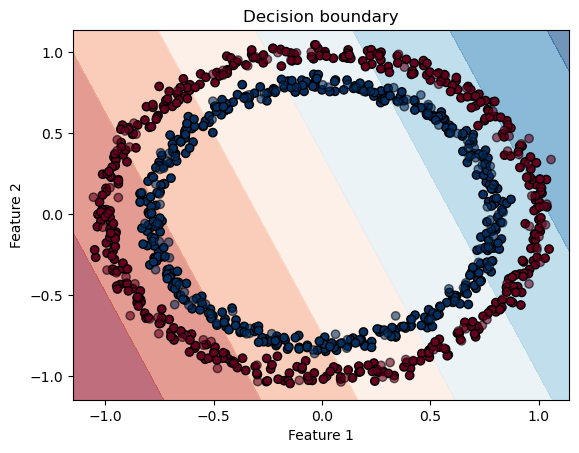

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define a grid of points spanning the range of the input data
x1_min, x1_max = X_train[:, 0].min() - 0.1, X_train[:, 0].max() + 0.1
x2_min, x2_max = X_train[:, 1].min() - 0.1, X_train[:, 1].max() + 0.1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.01), np.arange(x2_min, x2_max, 0.01))
grid = torch.FloatTensor(np.c_[xx1.ravel(), xx2.ravel()]).to(device)

# Apply the trained model to the grid of points
model_0.eval()
with torch.no_grad():
    Z = model_0(grid).detach().cpu().numpy()

# Reshape the output into a grid
Z = Z.reshape(xx1.shape)

# Plot the decision regions
plt.contourf(xx1, xx2, Z, cmap=plt.cm.RdBu, alpha=0.6)

# Plot the training set
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.RdBu, edgecolor='black')

# Plot the test set
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.RdBu, edgecolor='black', alpha=0.6)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision boundary')
plt.show()


la zone bleue représente les exemples que le modèle a classés comme positifs, tandis que la zone orange représente les exemples que le modèle a classés comme négatifs. La frontière de décision est la limite entre ces deux zones et représente la décision que le modèle prend lorsqu'il rencontre de nouveaux exemples.

En examinant le schéma, la frontière de décision est floue ou si les zones orange et bleue sont mélangées ne separe pas bien  les exemples positifs et négatifs , cela indique une performance médiocre ou insuffisante du modèle.

## 2. Quel est le probleme de ce modele ?

Le problème de ce modèle est qu'il n'est pas capable de séparer les deux classes de manière satisfaisante pour ce dataset en forme de cercles.

Les frontières de décision sont des lignes droites verticales, ce qui n'est pas adapté pour séparer les deux cercles.

## 3. Comment ameliorer les performances du modele ? Proposer 6 techniques d’am´elioration et impl´ementerune (ou la combinaison) des solutions proposees.

Voici quelque technique pour améliorer les performances d'un modèle de classification binaire :

###### 1.Augmentation des données :
 en ajoutant des données synthétiques à l'ensemble de données d'entraînement.

###### 2.Normalisation des données :
la normalisation des données peut aider à prévenir les problèmes de convergence et à accélérer l'apprentissage.

###### 3.Changement de l'architecture du modèle :
l'ajout de couches, l'augmentation ou la diminution du nombre de neurones dans les couches existantes, la modification de la fonction d'activation, etc.

###### 4.Optimisation des hyperparamètres :
les hyperparamètres tels que le taux d'apprentissage, le nombre d'epochs, le taux de dropout, etc. peuvent être ajustés pour améliorer les performances du modèle.

###### 5.Utilisation d'un autre algorithme d'optimisation :
l'utilisation d'un autre algorithme d'optimisation tel que Adam, RMSProp, etc. peut améliorer la convergence du modèle.

###### 6.Utilisation d'un autre type de modèle :
il peut être utile d'essayer un autre type de modèle tel que les réseaux de neurones convolutifs (CNN), les réseaux de neurones récurrents (RNN), etc.

### implémenter
1. la normalisation des données, on peut utiliser la fonction torch.nn.BatchNorm1d pour normaliser les données en entrée. Il suffit d'ajouter une couche de normalisation avant la première couche linéaire du modèle
2. ajouter 2 autre neurones (totale =7)
3. augmenter jusqua 1000 epochs



In [ ]:
class Model2(nn.Module):
    def __init__(self):
        super().__init__()
        self.bn = nn.BatchNorm1d(2)
        self.fc1 = nn.Linear(2, 7)
        self.fc2 = nn.Linear(7, 1)
        #self.fc3 = nn.Linear(2, 1)




    def forward(self, x):
        x = self.bn(x)
        x = self.fc1(x)
        x = self.fc2(x)
        #x = self.fc3(x)
        return x




In [ ]:
 model2 = Model2().to( device )

In [ ]:
torch.manual_seed (42)

epochs = 1000
print_every = 100
# Envoyer le dataset a l appareil d execution
X_train , y_train = X_train.to(device) , y_train.to(device)
X_test , y_test = X_test.to(device) , y_test.to(device)


for epoch in range (epochs):
    model2.train()

    y_logits = model2( X_train ).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))

    loss = loss_fn(y_logits , y_train )
    acc = accuracy_fn( y_true = y_train , y_pred = y_pred )

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()
    if (epoch+1) % print_every == 0:
        model_0.eval()
        with torch.inference_mode() :

            test_logits = model2( X_test ).squeeze()
            test_pred = torch.round( torch.sigmoid( test_logits ))

            test_loss = loss_fn( test_logits , y_test )
            test_acc = accuracy_fn( y_true = y_test , y_pred = test_pred )
        print(f"Epoch {epoch+1}/{epochs}:")
        print(f"Train loss: {loss:.4f}, Train accuracy: {acc:.4f}")
        print(f"Test loss: {test_loss:.4f}, Test accuracy: {test_acc:.4f}")

Epoch 100/1000:
Train loss: 0.7121, Train accuracy: 0.5337
Test loss: 0.7075, Test accuracy: 0.5350
Epoch 200/1000:
Train loss: 0.7121, Train accuracy: 0.5337
Test loss: 0.7075, Test accuracy: 0.5350
Epoch 300/1000:
Train loss: 0.7121, Train accuracy: 0.5337
Test loss: 0.7075, Test accuracy: 0.5350
Epoch 400/1000:
Train loss: 0.7121, Train accuracy: 0.5337
Test loss: 0.7075, Test accuracy: 0.5350
Epoch 500/1000:
Train loss: 0.7121, Train accuracy: 0.5337
Test loss: 0.7075, Test accuracy: 0.5350
Epoch 600/1000:
Train loss: 0.7121, Train accuracy: 0.5337
Test loss: 0.7075, Test accuracy: 0.5350
Epoch 700/1000:
Train loss: 0.7121, Train accuracy: 0.5337
Test loss: 0.7075, Test accuracy: 0.5350
Epoch 800/1000:
Train loss: 0.7121, Train accuracy: 0.5337
Test loss: 0.7075, Test accuracy: 0.5350
Epoch 900/1000:
Train loss: 0.7121, Train accuracy: 0.5337
Test loss: 0.7075, Test accuracy: 0.5350
Epoch 1000/1000:
Train loss: 0.7121, Train accuracy: 0.5337
Test loss: 0.7075, Test accuracy: 0.5350

il ya une petite amelioration de 2 %

# 2 Classification multi-classes avec des reseaux de neurones entierement connectes

### 1. Creer des donnees multi-classes avec make blobs()

In [ ]:
from sklearn.datasets import make_blobs

# Generate 1000 data points for 4 classes with 2 features
X, y = make_blobs(n_samples=1000, n_features=2, centers=4, random_state=42)


### 2. Transformer les donnees en tensors a l’aide de  torch.from numpy().


In [ ]:
import torch
from sklearn.model_selection import train_test_split

# Convert numpy arrays to PyTorch tensors
X_tensor = torch.from_numpy(X).float()
y_tensor = torch.from_numpy(y).long()

### 3. Diviser les donnees en ensembles d’apprentissage et de test a l’aide de  train test split()

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)

### 4. Visualiser les donnees.

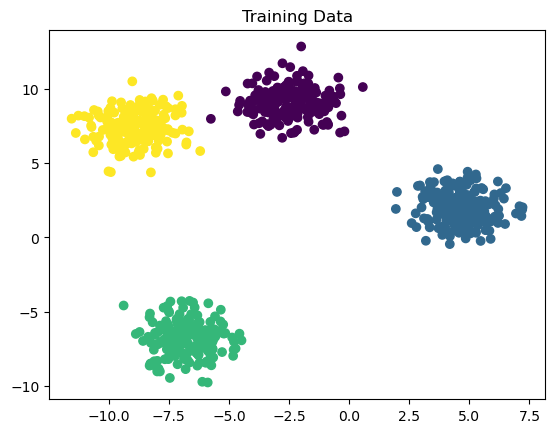

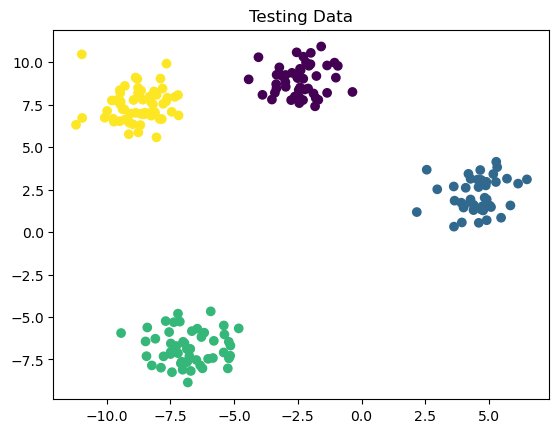

In [ ]:
# Visualize the data
import matplotlib.pyplot as plt

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.title('Training Data')
plt.show()

plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
plt.title('Testing Data')
plt.show()

### 5. Cet dataset necessite une fonction lineaire ou non lineaire pour s´eparer ses classes ? Justifier.

cet dataset a besoin d'une fonction non lineaire pour seperarer les classes deja on a 4 classes donc c'est impossible de les separer avec une finction lineaire

### 6. Proposer une architecture basee sur FCNN en PyTorch pour la classification de ces donnees et la developper

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class FCNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(FCNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):

        x = self.fc1(x)
        x = self.fc2(x)
        return x



In [ ]:
def calculate_accuracy(y_train, y_train_pred):
    # Convert the predicted probabilities to class labels
    _, predicted = torch.max(y_train_pred.data, 1)

    # Calculate the accuracy
    correct = (predicted == y_train).sum().item()
    total = len(y_train)
    accuracy = correct / total
    return accuracy

In [ ]:
import torch.optim as optim
from sklearn.metrics import accuracy_score

# Définir les hyperparamètres
learning_rate = 0.01
num_epochs = 100


# Créer le modèle
model = FCNN(input_size=2, hidden_size=5, num_classes=4)

# Définir la fonction de perte et l'optimiseur
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)



# Entraîner le modèle
for epoch in range(num_epochs):
    # Calculer la prédiction du modèle et la perte
    outputs = model(X_train)
    loss = loss_fn(outputs, y_train)

    # Mettre à jour les poids du modèle
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Évaluer le modèle toutes les 10 époques
    if (epoch+1) % 10 == 0:
        # Evaluer sur les données d'entraînement
        train_outputs = model(X_train)
        train_loss = loss_fn(train_outputs, y_train)
        train_acc =calculate_accuracy(y_train,train_outputs)
        # Evaluer sur les données de test
        test_outputs = model(X_test)
        test_loss = loss_fn(test_outputs, y_test)
        test_acc =calculate_accuracy(y_test,test_outputs)
        # Afficher les mesures de progression
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.4f}')


Epoch [10/100], Train Loss: 1.1852, Train Acc: 0.4313, Test Loss: 1.2204, Test Acc: 0.3700
Epoch [20/100], Train Loss: 0.7055, Train Acc: 0.9100, Test Loss: 0.7134, Test Acc: 0.9050
Epoch [30/100], Train Loss: 0.5112, Train Acc: 0.9762, Test Loss: 0.5142, Test Acc: 0.9900
Epoch [40/100], Train Loss: 0.4070, Train Acc: 0.9862, Test Loss: 0.4093, Test Acc: 0.9950
Epoch [50/100], Train Loss: 0.3411, Train Acc: 0.9912, Test Loss: 0.3434, Test Acc: 0.9950
Epoch [60/100], Train Loss: 0.2946, Train Acc: 0.9925, Test Loss: 0.2969, Test Acc: 0.9950
Epoch [70/100], Train Loss: 0.2593, Train Acc: 0.9938, Test Loss: 0.2617, Test Acc: 0.9950
Epoch [80/100], Train Loss: 0.2313, Train Acc: 0.9962, Test Loss: 0.2337, Test Acc: 0.9950
Epoch [90/100], Train Loss: 0.2085, Train Acc: 0.9975, Test Loss: 0.2107, Test Acc: 0.9950
Epoch [100/100], Train Loss: 0.1894, Train Acc: 0.9975, Test Loss: 0.1915, Test Acc: 0.9950


### 8. Afficher toutes les metriques de classification etudiees en cours (precision, rappel, score F1, matrice deconfusion, ...) et expliquer l’utilite de chacune d’elles en interpretant les resultats obtenus

##### Précision (precision):

Elle est calculée en divisant le nombre de vrais positifs par la somme des vrais positifs et des faux positifs.


Une haute précision indique que le modèle a une faible probabilité de prédire un exemple négatif comme positif. Cela est important lorsque les conséquences des faux positifs sont coûteuses.



##### Rappel (recall):

Il est calculé en divisant le nombre de vrais positifs par la somme des vrais positifs et des faux négatifs.

Un rappel élevé indique que le modèle a une faible probabilité de prédire un exemple positif comme négatif. Cela est important lorsque les conséquences des faux négatifs sont coûteuses.



##### Score F1 (F1-score):

Le score F1 est une moyenne harmonique de la précision et du rappel.

Il est calculé en divisant le produit de la précision et du rappel par leur somme. Le score F1 est utile lorsque la classe positive est sous-représentée.



##### Matrice de confusion (confusion matrix):

La matrice de confusion est une table qui montre le nombre de prédictions correctes et incorrectes pour chaque classe.

Elle est utile pour visualiser les performances du modèle et pour calculer d'autres mesures de classification.




##### En général:
la précision est importante lorsque les conséquences des faux positifs sont coûteuses, tandis que le rappel est important lorsque les conséquences des faux négatifs sont coûteuses.

Le score F1 est une mesure globale de performance qui prend en compte à la fois la précision et le rappel.

La matrice de confusion est utile pour comprendre les erreurs du modèle et pour ajuster les seuils de décision. L'exactitude est une mesure globale de performance qui peut être trompeuse si les classes sont déséquilibrées.

In [ ]:
import torch.optim as optim
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix

# Définir les hyperparamètres
learning_rate = 0.01
num_epochs = 100


# Créer le modèle
model = FCNN(input_size=2, hidden_size=16, num_classes=4)

# Définir la fonction de perte et l'optimiseur
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# Entraîner le modèle
for epoch in range(num_epochs):
    # Calculer la prédiction du modèle et la perte
    outputs = model(X_train)
    loss = loss_fn(outputs, y_train)

    # Mettre à jour les poids du modèle
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Évaluer le modèle toutes les 10 époques
    if (epoch+1) % 10 == 0:
        # Evaluer sur les données d'entraînement
        train_outputs = model(X_train)
        train_loss = loss_fn(train_outputs, y_train)
        train_acc = calculate_accuracy(y_train, train_outputs)
        train_precision, train_recall, train_f1, _ = precision_recall_fscore_support(y_train, torch.argmax(train_outputs, dim=1), average='weighted')
        train_cm = confusion_matrix(y_train, torch.argmax(train_outputs, dim=1))

        # Evaluer sur les données de test
        test_outputs = model(X_test)
        test_loss = loss_fn(test_outputs, y_test)
        test_acc = calculate_accuracy(y_test, test_outputs)
        test_precision, test_recall, test_f1, _ = precision_recall_fscore_support(y_test, torch.argmax(test_outputs, dim=1), average='weighted')
        test_cm = confusion_matrix(y_test, torch.argmax(test_outputs, dim=1))

        # Afficher les mesures de progression
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, Train Recall: {train_recall:.4f}, Train F1: {train_f1:.4f}, Train Confusion Matrix: \n{train_cm}')
        print(f'Epoch [{epoch+1}/{num_epochs}], Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.4f}, Test Recall: {test_recall:.4f}, Test F1: {test_f1:.4f}, Test Confusion Matrix: \n{test_cm}')


Epoch [10/100], Train Loss: 0.3820, Train Acc: 0.9888, Train Recall: 0.9888, Train F1: 0.9888, Train Confusion Matrix: 
[[200   0   0   1]
 [  8 201   0   0]
 [  0   0 197   0]
 [  0   0   0 193]]
Epoch [10/100], Test Loss: 0.3673, Test Acc: 0.9950, Test Recall: 0.9950, Test F1: 0.9950, Test Confusion Matrix: 
[[49  0  0  0]
 [ 1 40  0  0]
 [ 0  0 53  0]
 [ 0  0  0 57]]
Epoch [20/100], Train Loss: 0.2588, Train Acc: 0.9988, Train Recall: 0.9988, Train F1: 0.9988, Train Confusion Matrix: 
[[200   0   0   1]
 [  0 209   0   0]
 [  0   0 197   0]
 [  0   0   0 193]]
Epoch [20/100], Test Loss: 0.2546, Test Acc: 1.0000, Test Recall: 1.0000, Test F1: 1.0000, Test Confusion Matrix: 
[[49  0  0  0]
 [ 0 41  0  0]
 [ 0  0 53  0]
 [ 0  0  0 57]]
Epoch [30/100], Train Loss: 0.2006, Train Acc: 0.9988, Train Recall: 0.9988, Train F1: 0.9988, Train Confusion Matrix: 
[[200   0   0   1]
 [  0 209   0   0]
 [  0   0 197   0]
 [  0   0   0 193]]
Epoch [30/100], Test Loss: 0.1991, Test Acc: 1.0000, Test

ICI le F1-score et l'accuracy soient égaux peut indiquer que votre modèle de classification est bien équilibré dans ses prédictions. Donc notre modèle a réussi à identifier avec précision les classes positives et négatives de manière cohérente.



 POUR LA MTRICE DE CONFUSION  :
Elle indique le nombre de prédictions correctes et incorrectes pour chaque classe dans votre ensemble de données.
=>Dans notre cas on remarque que pour tous les classes le modele au pire il predit incorrectement une seule instance

### 9. Tracer la (les) frontiere(s) de decision pour les ensembles d’entraınement et de test.

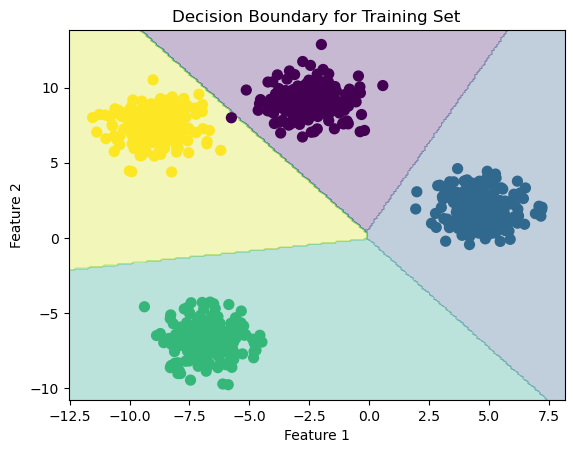

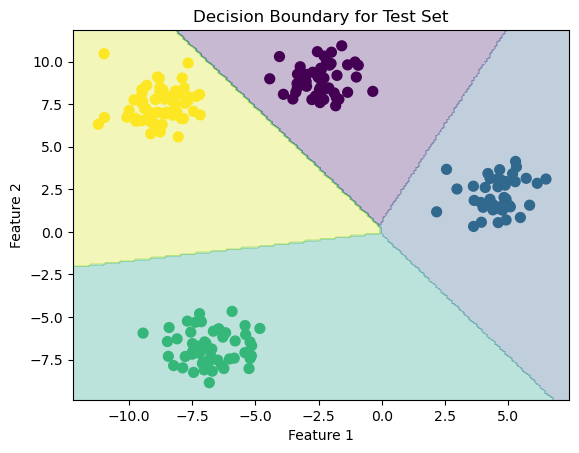

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Plot decision boundary for training set
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = model(torch.Tensor(np.c_[xx.ravel(), yy.ravel()]))
Z = np.argmax(Z.detach().numpy(), axis=1)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=50, cmap='viridis')
plt.title("Decision Boundary for Training Set")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Plot decision boundary for test set
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = model(torch.Tensor(np.c_[xx.ravel(), yy.ravel()]))
Z = np.argmax(Z.detach().numpy(), axis=1)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=50, cmap='viridis')
plt.title("Decision Boundary for Test Set")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


### 10. Etudier l’impact de l’augmentation du nombre d’echantillons dans le dataset sur l’exactitude de classification, et afficher la courbe de la progression de l’exactitude de classification en fonction du nombre d’echantillons dans le dataset

Training set size: 80, Test Acc: 1.0000
Training set size: 240, Test Acc: 1.0000
Training set size: 400, Test Acc: 1.0000
Training set size: 560, Test Acc: 1.0000
Training set size: 720, Test Acc: 1.0000
Training set size: 880, Test Acc: 1.0000
Training set size: 1040, Test Acc: 1.0000
Training set size: 1200, Test Acc: 1.0000
Training set size: 1360, Test Acc: 0.9950
Training set size: 1520, Test Acc: 1.0000
Training set size: 1680, Test Acc: 1.0000
Training set size: 1840, Test Acc: 1.0000


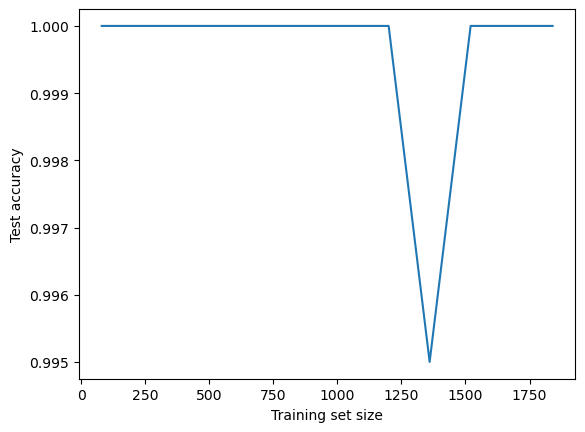

In [ ]:
import torch.optim as optim
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# Définir les hyperparamètres
learning_rate = 0.01
num_epochs = 100

# initial dataset size
dataset_size = X_train.shape[0]

# range of training set sizes to test
train_sizes = np.arange(0.1, 2.5, 0.2)

test_accs = [] # to store the test accuracy for each training set size

for train_size in train_sizes:
    # create the enlarged training set by randomly selecting more samples from the initial dataset
    indices = np.random.choice(dataset_size, size=int(train_size*dataset_size))
    X_train_enlarged = X_train[indices]
    y_train_enlarged = y_train[indices]

    # Créer le modèle
    model = FCNN(input_size=2, hidden_size=5, num_classes=4)

    # Définir la fonction de perte et l'optimiseur
    loss_fn = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)

    # Entraîner le modèle
    for epoch in range(num_epochs):
        # Calculer la prédiction du modèle et la perte
        outputs = model(X_train_enlarged)
        loss = loss_fn(outputs, y_train_enlarged)

        # Mettre à jour les poids du modèle
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Evaluer sur les données de test
    test_outputs = model(X_test)
    test_loss = loss_fn(test_outputs, y_test)
    test_acc = accuracy_score(y_test, torch.argmax(test_outputs, dim=1))

    test_accs.append(test_acc)
    print(f'Training set size: {int(train_size*dataset_size)}, Test Acc: {test_acc:.4f}')

# plot the progress of test accuracy as a function of training set size
plt.plot(train_sizes*dataset_size, test_accs)
plt.xlabel('Training set size')
plt.ylabel('Test accuracy')
plt.show()


les classes sont tellement bien séparé que même avec une augmentation ou diminution du training set l'accuracy reste assez grande

### 11. Etudier l’impact du choix de l’optimiseur, de la fonction de perte et des fonctions d’activation sur l’exactitude de classification.

 Adam optimizer, MultiMarginLos loss function, and relu activation function

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

learning_rate = 0.01
num_epochs = 100

# Define the Fully-Connected Neural Network (FCNN) model
class FCNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(FCNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# Create the model
model = FCNN(input_size=2, hidden_size=5, num_classes=4)

# Define the loss function and the optimizer
loss_fn = nn.MultiMarginLoss(p=1)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Train the model
for epoch in range(num_epochs):
    # Calculate the model's prediction and loss
    outputs = model(X_train)
    loss = loss_fn(outputs, y_train)

    # Update the model's weights
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Evaluate the model every 10 epochs
    if (epoch+1) % 10 == 0:
        # Evaluate on the training data
        train_outputs = model(X_train)
        train_loss = loss_fn(train_outputs, y_train)
        train_acc = calculate_accuracy(y_train, train_outputs)
        # Evaluate on the test data
        test_outputs = model(X_test)
        test_loss = loss_fn(test_outputs, y_test)
        test_acc = calculate_accuracy(y_test, test_outputs)
        # Print the progress measures
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.4f}')



Epoch [10/100], Train Loss: 0.2253, Train Acc: 0.5938, Test Loss: 0.2352, Test Acc: 0.5600
Epoch [20/100], Train Loss: 0.0629, Train Acc: 0.8838, Test Loss: 0.0594, Test Acc: 0.9000
Epoch [30/100], Train Loss: 0.0136, Train Acc: 0.9988, Test Loss: 0.0110, Test Acc: 1.0000
Epoch [40/100], Train Loss: 0.0048, Train Acc: 1.0000, Test Loss: 0.0043, Test Acc: 1.0000
Epoch [50/100], Train Loss: 0.0030, Train Acc: 0.9988, Test Loss: 0.0019, Test Acc: 1.0000
Epoch [60/100], Train Loss: 0.0024, Train Acc: 0.9988, Test Loss: 0.0012, Test Acc: 1.0000
Epoch [70/100], Train Loss: 0.0019, Train Acc: 0.9988, Test Loss: 0.0010, Test Acc: 1.0000
Epoch [80/100], Train Loss: 0.0016, Train Acc: 0.9988, Test Loss: 0.0008, Test Acc: 1.0000
Epoch [90/100], Train Loss: 0.0014, Train Acc: 0.9988, Test Loss: 0.0007, Test Acc: 1.0000
Epoch [100/100], Train Loss: 0.0013, Train Acc: 0.9988, Test Loss: 0.0005, Test Acc: 1.0000


### 12. Quels sont les principaux defis lies a l’utilisation de FCNN dans des applications du monde reel ?Comment peut-on surmonter ces defis ?

Les réseaux de neurones convolutifs entièrement connectés (FCNN) sont largement utilisés dans diverses applications du monde réel telles que la reconnaissance d'images, la détection d'objets, la segmentation sémantique, la traduction automatique et bien d'autres

Cependant, l'utilisation de FCNN dans des applications du monde réel présente également certains défiscomme :

###### Besoin de données de formation massives :
Les FCNN nécessitent des données massives pour leur entraînement, et la collecte de données de haute qualité peut être coûteuse et fastidieuse.

=> Pour surmonter ce défi, il est essentiel de trouver des moyens de collecter des données de haute qualité en utilisant des techniques telles que l'augmentation des données et le transfert de connaissances.

###### Temps de formation élevé :
Les FCNN ont besoin de beaucoup de temps pour leur entraînement, en particulier lorsque la taille des données d'entraînement est élevée.

=> Pour surmonter ce défi, il est possible d'utiliser des accélérateurs matériels tels que les GPU, les FPGAs ou les TPU pour accélérer le temps d'entraînement.

###### Overfitting :
Les FCNN peuvent souffrir de surapprentissage, c'est-à-dire qu'ils peuvent s'adapter trop bien aux données d'entraînement, ce qui peut conduire à une mauvaise généralisation.

=> Pour surmonter ce défi, il est possible d'utiliser des techniques de régularisation telles que la régularisation L1/L2, le dropout et la normalisation par lots.






### 13. Comment peut-on utiliser les modeles de classification bases sur FCNN pour resoudre des problemes du monde reel, tels que la etection de fraudes ou la reconnaissance de visages

Les modèles de classification basés sur FCNN peuvent aider dans les domaines de la détection de fraudes et de la reconnaissance de visages en utilisant des techniques de classification supervisée.

###### Dans le cas de la détection de fraudes:
un modèle de classification pourrait être entraîné à détecter les transactions frauduleuses en utilisant des données historiques étiquetées comme frauduleuses ou non frauduleuses. Une fois entraîné, le modèle peut être utilisé pour prédire la probabilité de fraude pour une transaction donnée, ce qui peut aider à automatiser le processus de détection de fraude et à réduire les pertes.

###### Dans le cas de la reconnaissance de visages :
un modèle de classification pourrait être entraîné à classer les images de visages en utilisant des données étiquetées de différentes personnes. Une fois entraîné, le modèle peut être utilisé pour identifier les personnes dans de nouvelles images ou vidéos, ce qui peut être utilisé dans des applications de sécurité ou de surveillance.